# 課題6: ディープラーニングのモデルを構築しよう

今回の課題では手書き数字の認識を、CNNを用いて行います。ただし本課題では、レッスン本編で用いたscikit-learnのものではなく、Kerasのデータセットに含まれている、より大きいサイズの手書き数字データで課題を進めていただきます。

下記にKerasから手書き数字のデータセットをダウンロードするコードが記載されています。このデータを用いてディープラーニングのモデルを構築してください。

今までのレッスンで学んだ内容を踏まえ、各セルにコードを埋めていってください。

（※`変更しないでください`と書かれたセルには、コードの追記変更をしないでください）

## 1. ライブラリのimport

In [55]:
# （変更しないでください）

# 必要なライブラリのimport
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# TensorFlow
import tensorflow as tf

# データの分割
from sklearn.model_selection import train_test_split

# DataFrameですべての列を表示する設定
pd.options.display.max_columns = None

## 2. データの読み込み

Kerasのデータセットは、あらかじめTraining setとTest setに分けられています。戻り値はタプルで取得できます。

In [56]:
# Kerasに添付されている手書き数字のデータセットをダウンロードして読み込む
# （変更しないでください）
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data()

## 3. データの確認

In [57]:
# X_train, Y_train, X_test, Y_testの形状を確認
print("Y_train=", Y_train.shape, ", X_train=", X_train.shape)
print("Y_test=", Y_test.shape, ", X_test=", X_test.shape)

Y_train= (60000,) , X_train= (60000, 28, 28)
Y_test= (10000,) , X_test= (10000, 28, 28)


In [58]:
# X_trainの先頭1行を表示
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [59]:
# Y_trainの先頭1行を表示
Y_train[0]

np.uint8(5)

データセットを可視化して表示します。

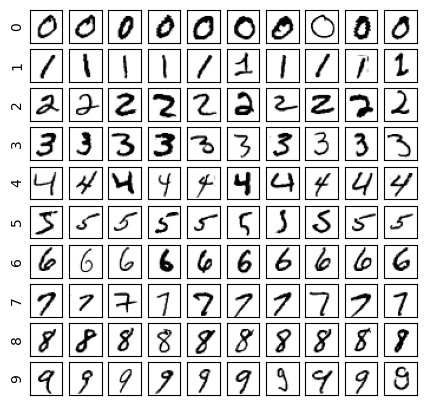

In [60]:
# （変更しないでください）

# 「数字:空のリスト」の辞書を作成する
images = {label: [] for label in range(0,10)}

# 総イメージ数
image_count = 0

# それぞれの数字のリストに、説明変数をappendしていく
for i in range(0, len(X_train)):
    if len(images[Y_train[i]]) < 10:
        images[Y_train[i]].append(X_train[i])
        image_count += 1
        if image_count == 100:
            break

# 10行10列にグラフを分割
fig, ax = plt.subplots(10, 10, figsize=(5, 5))

for i in range(10):
    # ラベル
    ax[i, 0].set_ylabel(i)

    for j in range(10):
        # 行=i、列=jの位置に画像を描画する
        ax[i, j].imshow(images[i][j].reshape(28, 28), cmap='Greys')

        # 目盛を表示しない設定
        ax[i, j].tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

plt.show()

## 4. データの前処理

In [61]:
# len関数を使い、X_trainを(X_trainの長さ, 28, 28, 1)にreshapeしてX_train2に代入
X_train2 = X_train.reshape(len(X_train), 28, 28, 1)


# len関数を使い、X_testを(X_testの長さ, 28, 28, 1)にreshapeしてX_test2に代入
X_test2 = X_test.reshape(len(X_test), 28, 28, 1)

In [62]:
# to_categoricalを使い、Y_trainをカテゴリー変数に展開してY_train2に代入
Y_train2 = tf.keras.utils.to_categorical(Y_train)


# to_categoricalを使い、Y_testをカテゴリー変数に展開してY_test2に代入
Y_test2 = tf.keras.utils.to_categorical(Y_test)

In [63]:
# X_train2, Y_train2, X_test2, Y_test2の形状を確認
print("Y_train2=", Y_train2.shape, ", X_train2=", X_train2.shape)
print("Y_test2=", Y_test2.shape, ", X_test2=", X_test2.shape)

Y_train2= (60000, 10) , X_train2= (60000, 28, 28, 1)
Y_test2= (10000, 10) , X_test2= (10000, 28, 28, 1)


In [64]:
# train_test_splitを使い、学習データと検証データに7:3（検証データが3割）で分割する
# （詳細：データ(X_train2、Y_train2)を「X_train2, X_valid2, Y_train2, Y_valid2」に分割）
X_train2, X_valid2, Y_train2, Y_valid2 = train_test_split(X_train2, Y_train2, test_size=0.3, random_state=0)

In [65]:
# X_train2, Y_train2, X_valid2, Y_valid2, X_test2, Y_test2の形状を確認
print("Y_train2=", Y_train2.shape, ", X_train2=", X_train2.shape)
print("Y_valid2=", Y_valid2.shape, ", X_valid2=", X_valid2.shape)
print("Y_test2=", Y_test2.shape, ", X_test2=", X_test2.shape)

Y_train2= (42000, 10) , X_train2= (42000, 28, 28, 1)
Y_valid2= (18000, 10) , X_valid2= (18000, 28, 28, 1)
Y_test2= (10000, 10) , X_test2= (10000, 28, 28, 1)


## 5. モデルの構築

Kerasを使ってモデルを構築してみましょう。以下を条件とします：

- CNN(Conv2D)を使うこと
- 正解率(accuracy)が50%以上であること

場合によっては、学習にものすごく時間がかかる場合もあります。適宜、パラメータ数を調整して行なってください。

In [66]:
# （モデルの初期化から構築までのコードを、このセル以下に記述してください）
# モデルの初期化
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# モデルの構築
model.compile(optimizer = "rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [67]:
# モデルの構造を表示
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │       346,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 347,146 (1.32 MB)

 Trainable params: 347,146 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [68]:
%%time
# 学習の実施(ものすごく時間がかかる場合もあります)
log = model.fit(X_train2, Y_train2, epochs=5000, batch_size=32, verbose=True,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            min_delta=0, patience=100,
                                                            verbose=1)],
                validation_data=(X_valid2, Y_valid2))

Epoch 1/5000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9153 - loss: 0.6049 - val_accuracy: 0.9716 - val_loss: 0.1002
Epoch 2/5000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9780 - loss: 0.0782 - val_accuracy: 0.9718 - val_loss: 0.1122
Epoch 3/5000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9860 - loss: 0.0498 - val_accuracy: 0.9771 - val_loss: 0.1011
Epoch 4/5000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9905 - loss: 0.0355 - val_accuracy: 0.9741 - val_loss: 0.1344
Epoch 5/5000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9936 - loss: 0.0261 - val_accuracy: 0.9788 - val_loss: 0.1167
Epoch 6/5000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9951 - loss: 0.0210 - val_accuracy: 0.9803 - val_loss: 0.1177
Epoch 7/5000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9963 - loss: 0.0152 - val_accuracy: 0.9787 - val_loss: 0.1855
Epoch 8/5000
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9970 -

Text(0, 0.5, 'crossentropy')

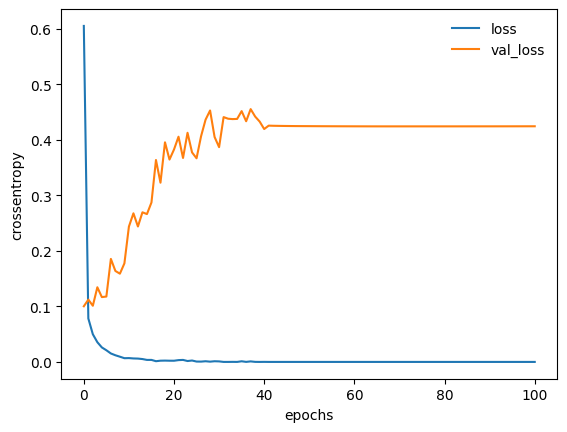

In [69]:
# 学習過程をグラフ表示
plt.plot(log.history['loss'], label='loss')
plt.plot(log.history['val_loss'], label='val_loss')
plt.legend(frameon=False) # 凡例の表示
plt.xlabel("epochs")
plt.ylabel("crossentropy")

In [70]:
# predictを使い、X_test2をもとに予測した結果を、
# カテゴリー変数へ復元してY_pred2に代入
Y_pred2 = np.argmax(model.predict(X_test2), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step


In [71]:
# Y_test2もカテゴリー変数へ復元して、Y_test2_ に代入
Y_test2_ = np.argmax(Y_test2, axis=1)

In [72]:
# classification_reportを使い、モデルの評価を実施
from sklearn.metrics import classification_report
print(classification_report(Y_test2_, Y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

